In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import pickle

In [15]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [16]:
dataframe.shape

(400, 5)

In [17]:
dataframe,test = train_test_split(dataframe,test_size= 0.1)

In [18]:
test.to_csv('Data/test.csv')

In [19]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
333,15587177,Male,40,65000,0
271,15688172,Female,59,76000,1
204,15660866,Female,58,101000,1
227,15685346,Male,56,133000,1
373,15708791,Male,59,130000,1


In [20]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,360.0,1.568945e+07,71476.801004,15566689.0,15623334.75,15691835.5,15749549.75,15815236.0
Age,360.0,3.811111e+01,10.440647,18.0,30.00,37.0,46.00,60.0
EstimatedSalary,360.0,6.931944e+04,33866.453434,15000.0,43000.00,68500.0,87000.00,150000.0
Purchased,360.0,3.555556e-01,0.479348,0.0,0.00,0.0,1.00,1.0


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 333 to 66
Data columns (total 5 columns):
User ID            360 non-null int64
Gender             360 non-null object
Age                360 non-null int64
EstimatedSalary    360 non-null int64
Purchased          360 non-null int64
dtypes: int64(4), object(1)
memory usage: 16.9+ KB


In [22]:
dataframe.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
for each in dataframe.columns:
    dataframe[each]=dataframe[each].fillna((dataframe[each].mean))

In [24]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
333,15587177,Male,40,65000,0
271,15688172,Female,59,76000,1
204,15660866,Female,58,101000,1
227,15685346,Male,56,133000,1
373,15708791,Male,59,130000,1


In [25]:
lb = LabelBinarizer()
dataframe['Gender'] = lb.fit_transform(dataframe['Gender'])

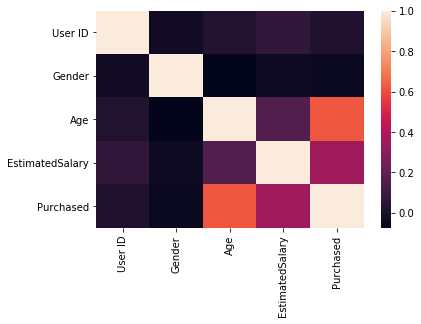

In [26]:
sns.heatmap(dataframe.corr())

In [27]:
dataframe.drop(['User ID','Gender'], axis=1,inplace=True)

In [30]:
cols = (dataframe.columns).drop(['Purchased'])

In [31]:
dataframe.head()

,Age,EstimatedSalary,Purchased
333,40,65000,0
271,59,76000,1
204,58,101000,1
227,56,133000,1
373,59,130000,1


In [32]:
X_train = dataframe.drop(['Purchased'],axis=1)
Y_train = dataframe['Purchased']

In [33]:
svc = SVC(kernel='poly',random_state=0)
dt = DecisionTreeClassifier(criterion='gini')
lr = LogisticRegression()
lrcv = LogisticRegressionCV()

In [34]:
# svc degree for polynomial, gamma for kernel
# svc()
params = [
    {'C':[1,5,10,150,100], 'kernel':['linear','rbf','poly','sigmoid'], 'gamma':[0.2,0.4,0.1,0.05,0.06,0.07,0.08,0.09,1.0]}
]
gs = GridSearchCV(estimator =svc,param_grid=params,scoring='accuracy',cv = 10, n_jobs=-1)

In [ ]:
gs.fit(X_train,Y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_